# Phase 2 & 3 

In [1]:
import warnings
warnings.filterwarnings('ignore')
###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn import metrics

#### Extracting the Dataset files from the .tar file

In [2]:
import tarfile
my_tar = tarfile.open('C:/Users/EMAN/Desktop/MLProject/millionsongsubset.tar')
my_tar.extractall('C:/Users/EMAN/Desktop/MLProject/MSD_subset') # folder to extract to
my_tar.close()

#### TopMAGD link: http://www.ifs.tuwien.ac.at/mir/msd/TopMAGD.html

In [3]:
from collections import defaultdict

data_dict = defaultdict(list)
data_list = []

# MSD Allmusic Style Dataset (MASD)
file = open("C:/Users/EMAN/Desktop/MLProject/topMAGD.txt")
contents = file.read()
# print (contents,"\n")
data_list = [lines.split("\t") for lines in contents.split("\n")]
for line in data_list:
#     print (line,"\n")
    genre_file = line[0]
    genre = line[1]
    data_dict[genre].append(genre_file)

print("Number of instances in each Genre:")
i = 0
for key in data_dict:
    i = i+1 
    print("\t", i ,key, "=", len(data_dict[key]))

Number of instances in each Genre:
	 1 Pop_Rock = 238786
	 2 Rap = 20939
	 3 Vocal = 6195
	 4 Electronic = 41075
	 5 Blues = 6836
	 6 RnB = 14335
	 7 Folk = 5865
	 8 Country = 11772
	 9 Jazz = 17836
	 10 New Age = 4010
	 11 Latin = 17590
	 12 International = 14242
	 13 Reggae = 6946


In [4]:
import os
import glob
def get_all_files(basedir,ext='.h5') :
    cnt = 0
    found = 0
    Final_data = defaultdict(list)
    for root, dirs, files in os.walk(basedir):
        for file in files:
            for key in data_dict:
                f = file[:-3]
                if f in data_dict[key]:
                    found = found + 1
                    Final_data[key].append(f)
        files = glob.glob(os.path.join(root,'*'+ext))
        cnt += len(files)
#     print(found)
#     print(Final_data)
    return Final_data

In [5]:
# number of the songs in the subset we downloaded from MSD
MSD_subset_dir = "C:/Users/EMAN/Desktop/MLProject/MSD_subset"
Data = get_all_files(MSD_subset_dir,ext='.h5')

In [6]:
Data

defaultdict(list,
            {'Rap': ['TRAAAAW128F429D538',
              'TRAAAMQ128F1460CD3',
              'TRAAHEG128E07861C3',
              'TRAAHZP12903CA25F4',
              'TRAAJJA12903CC518A',
              'TRAAMII128F933B583',
              'TRAAQIH128F428BDEA',
              'TRAATWQ12903CC5BA8',
              'TRABGUU128F4227C0A',
              'TRABYVN128F429E5CF',
              'TRACCKS128F42B77AE',
              'TRACCSW128F148C7C3',
              'TRACHHH128E0788A35',
              'TRACVTK128F4288966',
              'TRADBUP128EF354F6C',
              'TRADEYR12903CC488D',
              'TRADMUH128F146D3CD',
              'TRADODV128F4283EB6',
              'TRADTQK12903CB67C9',
              'TRAEDYD128F425A868',
              'TRAEGBE128F4284973',
              'TRAEJIW12903CE0B99',
              'TRAEQLX128F1468799',
              'TRAERAC128F92E0186',
              'TRAESJK128E0792227',
              'TRAEVKG12903CE75F4',
              'TRAFHJI128F9302CFF',
   

In [7]:
i = 0
for key in Data:
    i = i+1 
    print("\t", i ,key, "=", len(Data[key]))

	 1 Rap = 236
	 2 Pop_Rock = 1926
	 3 RnB = 132
	 4 New Age = 95
	 5 Latin = 257
	 6 International = 147
	 7 Jazz = 173
	 8 Folk = 48
	 9 Blues = 126
	 10 Electronic = 228
	 11 Country = 175
	 12 Reggae = 120
	 13 Vocal = 36


In [8]:
import os

source = 'C:/Users/EMAN/Desktop/MLProject/MSD_subset'
destination = 'C:/Users/EMAN/Desktop/MLProject/Final_Dataset/'

for subdir, dirs, files in os.walk(source):
    for filename in files:
        filepath = subdir + os.sep + filename
#         print (filepath)
        for key in Data:
                f = filename[:-3]
                if f in Data[key]:
                    os.rename(filepath, destination + filename)

# Initializing the features (New Way)

In [175]:
import os
import sys
import hdf5_getters
import numpy as np

features = []
features_names = []
flag= True

print("Hereeee 0")
cnt = 0
test = 'C:/Users/EMAN/Desktop/dataset/'
path = "C:\\Users\\EMAN\\Desktop\\dataset\\"
print("Hereeee 1")
for root, dirs, files in os.walk(test):
#     print("Hereeee outer loop")
    for filename in files:
#         print("Hereeee inner loop")
        filepath = path + filename
        # get params
        hdf5path = filepath
        songidx = 0
        onegetter = ''
        # sanity check
        if not os.path.isfile(hdf5path):
            print ('ERROR: file',hdf5path,'does not exist.')
            sys.exit(0)
        h5 = hdf5_getters.open_h5_file_read(hdf5path)
        numSongs = hdf5_getters.get_num_songs(h5)
        if songidx >= numSongs:
            print ('ERROR: file contains only',numSongs)
            h5.close()
            sys.exit(0)

        # get all getters
        getters = list(filter(lambda x: x[:4] == 'get_', hdf5_getters.__dict__.keys()))
        getters.remove("get_num_songs") # special case
        if onegetter == 'num_songs' or onegetter == 'get_num_songs':
            getters = []
        elif onegetter != '':
            if onegetter[:4] != 'get_':
                onegetter = 'get_' + onegetter
            try:
                getters.index(onegetter)
            except ValueError:
                print ('ERROR: getter requested:',onegetter,'does not exist.')
                h5.close()
                sys.exit(0)
            getters = [onegetter]
        getters = np.sort(getters)
        size = 0
        # print them
        for getter in getters:
            try:
                res = hdf5_getters.__getattribute__(getter)(h5,songidx)

            except (AttributeError) as e:
                if summary:
                    continue
                else:
                    print (e)
                    print ('forgot -summary flag? specified wrong getter?')
            size = size +1
            if(flag):
                features_names.append(getter[4:])
            if res.__class__.__name__ == 'ndarray':
                val = res.shape
                val = val[0]
                features.append(val)
#                 print (getter[4:]+": shape =",res.shape)
            else:
#                 print (getter[4:]+":",res)
                features.append(res)

        # done
        flag = False
#         print ('DONE, showed song',songidx,'/',numSongs-1,'in file:',hdf5path)
#         print("Number of features:", size)
        h5.close()
    
        
#         filepath = root + os.sep + filename
#         print("my path helloo ",filepath)
#         command ='.\display_song.py "{}"'.format(filepath)
#         print("hiiiiii", command)
#         out = subprocess.check_output(command, shell = True).decode("utf-8")
#         print("feen el outputttt ya prince",out)
#     cnt += len(files)
# print(cnt)

Hereeee 0
Hereeee 1


In [176]:
import tables


def open_h5_file_read(h5filename):
    """
    Open an existing H5 in read mode.
    Same function as in hdf5_utils, here so we avoid one import
    """
    return tables.open_file(h5filename, mode='r')


def get_num_songs(h5):
    """
    Return the number of songs contained in this h5 file, i.e. the number of rows
    for all basic informations like name, artist, ...
    """
    return h5.root.metadata.songs.nrows

def get_artist_familiarity(h5,songidx=0):
    """
    Get artist familiarity from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.artist_familiarity[songidx]

def get_artist_hotttnesss(h5,songidx=0):
    """
    Get artist hotttnesss from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.artist_hotttnesss[songidx]

def get_artist_id(h5,songidx=0):
    """
    Get artist id from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.artist_id[songidx]

def get_artist_mbid(h5,songidx=0):
    """
    Get artist musibrainz id from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.artist_mbid[songidx]

def get_artist_playmeid(h5,songidx=0):
    """
    Get artist playme id from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.artist_playmeid[songidx]

def get_artist_7digitalid(h5,songidx=0):
    """
    Get artist 7digital id from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.artist_7digitalid[songidx]

def get_artist_latitude(h5,songidx=0):
    """
    Get artist latitude from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.artist_latitude[songidx]

def get_artist_longitude(h5,songidx=0):
    """
    Get artist longitude from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.artist_longitude[songidx]

def get_artist_location(h5,songidx=0):
    """
    Get artist location from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.artist_location[songidx]

def get_artist_name(h5,songidx=0):
    """
    Get artist name from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.artist_name[songidx]

def get_release(h5,songidx=0):
    """
    Get release from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.release[songidx]

def get_release_7digitalid(h5,songidx=0):
    """
    Get release 7digital id from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.release_7digitalid[songidx]

def get_song_id(h5,songidx=0):
    """
    Get song id from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.song_id[songidx]

def get_song_hotttnesss(h5,songidx=0):
    """
    Get song hotttnesss from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.song_hotttnesss[songidx]

def get_title(h5,songidx=0):
    """
    Get title from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.title[songidx]

def get_track_7digitalid(h5,songidx=0):
    """
    Get track 7digital id from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.track_7digitalid[songidx]

def get_similar_artists(h5,songidx=0):
    """
    Get similar artists array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.metadata.songs.nrows == songidx + 1:
        return h5.root.metadata.similar_artists[h5.root.metadata.songs.cols.idx_similar_artists[songidx]:]
    return h5.root.metadata.similar_artists[h5.root.metadata.songs.cols.idx_similar_artists[songidx]:
                                            h5.root.metadata.songs.cols.idx_similar_artists[songidx+1]]

def get_artist_terms(h5,songidx=0):
    """
    Get artist terms array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.metadata.songs.nrows == songidx + 1:
        return h5.root.metadata.artist_terms[h5.root.metadata.songs.cols.idx_artist_terms[songidx]:]
    return h5.root.metadata.artist_terms[h5.root.metadata.songs.cols.idx_artist_terms[songidx]:
                                            h5.root.metadata.songs.cols.idx_artist_terms[songidx+1]]

def get_artist_terms_freq(h5,songidx=0):
    """
    Get artist terms array frequencies. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.metadata.songs.nrows == songidx + 1:
        return h5.root.metadata.artist_terms_freq[h5.root.metadata.songs.cols.idx_artist_terms[songidx]:]
    return h5.root.metadata.artist_terms_freq[h5.root.metadata.songs.cols.idx_artist_terms[songidx]:
                                              h5.root.metadata.songs.cols.idx_artist_terms[songidx+1]]

def get_artist_terms_weight(h5,songidx=0):
    """
    Get artist terms array frequencies. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.metadata.songs.nrows == songidx + 1:
        return h5.root.metadata.artist_terms_weight[h5.root.metadata.songs.cols.idx_artist_terms[songidx]:]
    return h5.root.metadata.artist_terms_weight[h5.root.metadata.songs.cols.idx_artist_terms[songidx]:
                                                h5.root.metadata.songs.cols.idx_artist_terms[songidx+1]]

def get_analysis_sample_rate(h5,songidx=0):
    """
    Get analysis sample rate from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.analysis_sample_rate[songidx]

def get_audio_md5(h5,songidx=0):
    """
    Get audio MD5 from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.audio_md5[songidx]

def get_danceability(h5,songidx=0):
    """
    Get danceability from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.danceability[songidx]

def get_duration(h5,songidx=0):
    """
    Get duration from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.duration[songidx]

def get_end_of_fade_in(h5,songidx=0):
    """
    Get end of fade in from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.end_of_fade_in[songidx]

def get_energy(h5,songidx=0):
    """
    Get energy from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.energy[songidx]

def get_key(h5,songidx=0):
    """
    Get key from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.key[songidx]

def get_key_confidence(h5,songidx=0):
    """
    Get key confidence from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.key_confidence[songidx]

def get_loudness(h5,songidx=0):
    """
    Get loudness from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.loudness[songidx]

def get_mode(h5,songidx=0):
    """
    Get mode from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.mode[songidx]

def get_mode_confidence(h5,songidx=0):
    """
    Get mode confidence from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.mode_confidence[songidx]

def get_start_of_fade_out(h5,songidx=0):
    """
    Get start of fade out from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.start_of_fade_out[songidx]

def get_tempo(h5,songidx=0):
    """
    Get tempo from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.tempo[songidx]

def get_time_signature(h5,songidx=0):
    """
    Get signature from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.time_signature[songidx]

def get_time_signature_confidence(h5,songidx=0):
    """
    Get signature confidence from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.time_signature_confidence[songidx]

def get_track_id(h5,songidx=0):
    """
    Get track id from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.track_id[songidx]

def get_segments_start(h5,songidx=0):
    """
    Get segments start array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.segments_start[h5.root.analysis.songs.cols.idx_segments_start[songidx]:]
    return h5.root.analysis.segments_start[h5.root.analysis.songs.cols.idx_segments_start[songidx]:
                                           h5.root.analysis.songs.cols.idx_segments_start[songidx+1]]
    
def get_segments_confidence(h5,songidx=0):
    """
    Get segments confidence array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.segments_confidence[h5.root.analysis.songs.cols.idx_segments_confidence[songidx]:]
    return h5.root.analysis.segments_confidence[h5.root.analysis.songs.cols.idx_segments_confidence[songidx]:
                                                h5.root.analysis.songs.cols.idx_segments_confidence[songidx+1]]

def get_segments_pitches(h5,songidx=0):
    """
    Get segments pitches array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.segments_pitches[h5.root.analysis.songs.cols.idx_segments_pitches[songidx]:,:]
    return h5.root.analysis.segments_pitches[h5.root.analysis.songs.cols.idx_segments_pitches[songidx]:
                                             h5.root.analysis.songs.cols.idx_segments_pitches[songidx+1],:]

def get_segments_timbre(h5,songidx=0):
    """
    Get segments timbre array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.segments_timbre[h5.root.analysis.songs.cols.idx_segments_timbre[songidx]:,:]
    return h5.root.analysis.segments_timbre[h5.root.analysis.songs.cols.idx_segments_timbre[songidx]:
                                            h5.root.analysis.songs.cols.idx_segments_timbre[songidx+1],:]

def get_segments_loudness_max(h5,songidx=0):
    """
    Get segments loudness max array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.segments_loudness_max[h5.root.analysis.songs.cols.idx_segments_loudness_max[songidx]:]
    return h5.root.analysis.segments_loudness_max[h5.root.analysis.songs.cols.idx_segments_loudness_max[songidx]:
                                                  h5.root.analysis.songs.cols.idx_segments_loudness_max[songidx+1]]

def get_segments_loudness_max_time(h5,songidx=0):
    """
    Get segments loudness max time array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.segments_loudness_max_time[h5.root.analysis.songs.cols.idx_segments_loudness_max_time[songidx]:]
    return h5.root.analysis.segments_loudness_max_time[h5.root.analysis.songs.cols.idx_segments_loudness_max_time[songidx]:
                                                       h5.root.analysis.songs.cols.idx_segments_loudness_max_time[songidx+1]]

def get_segments_loudness_start(h5,songidx=0):
    """
    Get segments loudness start array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.segments_loudness_start[h5.root.analysis.songs.cols.idx_segments_loudness_start[songidx]:]
    return h5.root.analysis.segments_loudness_start[h5.root.analysis.songs.cols.idx_segments_loudness_start[songidx]:
                                                    h5.root.analysis.songs.cols.idx_segments_loudness_start[songidx+1]]

def get_sections_start(h5,songidx=0):
    """
    Get sections start array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.sections_start[h5.root.analysis.songs.cols.idx_sections_start[songidx]:]
    return h5.root.analysis.sections_start[h5.root.analysis.songs.cols.idx_sections_start[songidx]:
                                           h5.root.analysis.songs.cols.idx_sections_start[songidx+1]]

def get_sections_confidence(h5,songidx=0):
    """
    Get sections confidence array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.sections_confidence[h5.root.analysis.songs.cols.idx_sections_confidence[songidx]:]
    return h5.root.analysis.sections_confidence[h5.root.analysis.songs.cols.idx_sections_confidence[songidx]:
                                                h5.root.analysis.songs.cols.idx_sections_confidence[songidx+1]]

def get_beats_start(h5,songidx=0):
    """
    Get beats start array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.beats_start[h5.root.analysis.songs.cols.idx_beats_start[songidx]:]
    return h5.root.analysis.beats_start[h5.root.analysis.songs.cols.idx_beats_start[songidx]:
                                        h5.root.analysis.songs.cols.idx_beats_start[songidx+1]]

def get_beats_confidence(h5,songidx=0):
    """
    Get beats confidence array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.beats_confidence[h5.root.analysis.songs.cols.idx_beats_confidence[songidx]:]
    return h5.root.analysis.beats_confidence[h5.root.analysis.songs.cols.idx_beats_confidence[songidx]:
                                             h5.root.analysis.songs.cols.idx_beats_confidence[songidx+1]]

def get_bars_start(h5,songidx=0):
    """
    Get bars start array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.bars_start[h5.root.analysis.songs.cols.idx_bars_start[songidx]:]
    return h5.root.analysis.bars_start[h5.root.analysis.songs.cols.idx_bars_start[songidx]:
                                       h5.root.analysis.songs.cols.idx_bars_start[songidx+1]]

def get_bars_confidence(h5,songidx=0):
    """
    Get bars start array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.bars_confidence[h5.root.analysis.songs.cols.idx_bars_confidence[songidx]:]
    return h5.root.analysis.bars_confidence[h5.root.analysis.songs.cols.idx_bars_confidence[songidx]:
                                            h5.root.analysis.songs.cols.idx_bars_confidence[songidx+1]]

def get_tatums_start(h5,songidx=0):
    """
    Get tatums start array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.tatums_start[h5.root.analysis.songs.cols.idx_tatums_start[songidx]:]
    return h5.root.analysis.tatums_start[h5.root.analysis.songs.cols.idx_tatums_start[songidx]:
                                         h5.root.analysis.songs.cols.idx_tatums_start[songidx+1]]

def get_tatums_confidence(h5,songidx=0):
    """
    Get tatums confidence array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.tatums_confidence[h5.root.analysis.songs.cols.idx_tatums_confidence[songidx]:]
    return h5.root.analysis.tatums_confidence[h5.root.analysis.songs.cols.idx_tatums_confidence[songidx]:
                                              h5.root.analysis.songs.cols.idx_tatums_confidence[songidx+1]]

def get_artist_mbtags(h5,songidx=0):
    """
    Get artist musicbrainz tag array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.musicbrainz.songs.nrows == songidx + 1:
        return h5.root.musicbrainz.artist_mbtags[h5.root.musicbrainz.songs.cols.idx_artist_mbtags[songidx]:]
    return h5.root.musicbrainz.artist_mbtags[h5.root.metadata.songs.cols.idx_artist_mbtags[songidx]:
                                             h5.root.metadata.songs.cols.idx_artist_mbtags[songidx+1]]

def get_artist_mbtags_count(h5,songidx=0):
    """
    Get artist musicbrainz tag count array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.musicbrainz.songs.nrows == songidx + 1:
        return h5.root.musicbrainz.artist_mbtags_count[h5.root.musicbrainz.songs.cols.idx_artist_mbtags[songidx]:]
    return h5.root.musicbrainz.artist_mbtags_count[h5.root.metadata.songs.cols.idx_artist_mbtags[songidx]:
                                                   h5.root.metadata.songs.cols.idx_artist_mbtags[songidx+1]]

def get_year(h5,songidx=0):
    """
    Get release year from a HDF5 song file, by default the first song in it
    """
    return h5.root.musicbrainz.songs.cols.year[songidx]

In [177]:
print(features_names)

['analysis_sample_rate', 'artist_7digitalid', 'artist_familiarity', 'artist_hotttnesss', 'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude', 'artist_mbid', 'artist_mbtags', 'artist_mbtags_count', 'artist_name', 'artist_playmeid', 'artist_terms', 'artist_terms_freq', 'artist_terms_weight', 'audio_md5', 'bars_confidence', 'bars_start', 'beats_confidence', 'beats_start', 'danceability', 'duration', 'end_of_fade_in', 'energy', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'release', 'release_7digitalid', 'sections_confidence', 'sections_start', 'segments_confidence', 'segments_loudness_max', 'segments_loudness_max_time', 'segments_loudness_start', 'segments_pitches', 'segments_start', 'segments_timbre', 'similar_artists', 'song_hotttnesss', 'song_id', 'start_of_fade_out', 'tatums_confidence', 'tatums_start', 'tempo', 'time_signature', 'time_signature_confidence', 'title', 'track_7digitalid', 'track_id', 'year']


In [178]:
A = np.array(features)
B = np.reshape(A, (-1, 54))
df = pd.DataFrame(B, columns=features_names)
print(df.shape)
df.head()

(3699, 54)


,analysis_sample_rate,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_mbtags,...,start_of_fade_out,tatums_confidence,tatums_start,tempo,time_signature,time_signature_confidence,title,track_7digitalid,track_id,year
0,b'22050',b'165270',b'0.5817937658450281',b'0.4019975433642836',b'ARD7TVE1187B99BFB1',b'nan',b'California - LA',b'nan',b'e77e51a5-4761-45b3-9847-2051f811e366',b'0',...,b'218.932',b'688',b'688',b'92.198',b'4',b'0.778',"b""I Didn't Mean To""",b'3401791',b'TRAAAAW128F429D538',b'0'
1,b'22050',b'1998',b'0.6306300375898077',b'0.4174996449709784',b'ARMJAGH1187FB546F3',b'35.14968',"b'Memphis, TN'",b'-90.04892',b'1c78ab62-db33-4433-8d0b-7c8dcf1849c2',b'1',...,b'137.915',b'591',b'591',b'121.274',b'4',b'0.384',b'Soul Deep',b'3400270',b'TRAAABD128F429CF47',b'1969'
2,b'22050',b'19072',b'0.6303823341467806',b'0.4542311565706205',b'AR7G5I41187FB4CE6C',b'nan',"b'London, England'",b'nan',b'e188a520-9cb7-4f73-a3d7-2f70c6538e92',b'3',...,b'217.124',b'924',b'924',b'119.293',b'4',b'0.0',b'Something Girls',b'3226795',b'TRAAAEF128F4273421',b'1982'
3,b'22050',b'30973',b'0.6510456608317947',b'0.40172368550367865',b'ARXR32B1187FB57099',b'nan',b'',b'nan',b'c6903a2e-063c-4f91-a284-17b8f421be7b',b'0',...,b'198.699',b'887',b'887',b'129.738',b'4',b'0.562',b'Face the Ashes',b'6795666',b'TRAAAFD128F92F423A',b'2007'
4,b'22050',b'17970',b'0.5564956019129572',b'0.2619411773808474',b'ARD0S291187B9B7BF5',b'nan',b'Ohio',b'nan',b'56503d6d-094e-4c28-ae3d-04cc748ade5b',b'0',...,b'114.782',b'434',b'434',b'111.787',b'1',b'0.0',b'Keepin It Real (Skit)',b'276593',b'TRAAAMQ128F1460CD3',b'0'


In [179]:
print(df.dtypes)

analysis_sample_rate          |S174
artist_7digitalid             |S174
artist_familiarity            |S174
artist_hotttnesss             |S174
artist_id                     |S174
artist_latitude               |S174
artist_location               |S174
artist_longitude              |S174
artist_mbid                   |S174
artist_mbtags                 |S174
artist_mbtags_count           |S174
artist_name                   |S174
artist_playmeid               |S174
artist_terms                  |S174
artist_terms_freq             |S174
artist_terms_weight           |S174
audio_md5                     |S174
bars_confidence               |S174
bars_start                    |S174
beats_confidence              |S174
beats_start                   |S174
danceability                  |S174
duration                      |S174
end_of_fade_in                |S174
energy                        |S174
key                           |S174
key_confidence                |S174
loudness                    

### Decoding the byte strings

In [180]:
df_cpy = df.copy()

for col in features_names:
#     print(df[col].str.decode('utf-8'))
    df_cpy[col] = df[col].str.decode('utf-8')
    print(df_cpy[col])


0       22050
1       22050
2       22050
3       22050
4       22050
        ...  
3694    22050
3695    22050
3696    22050
3697    22050
3698    22050
Name: analysis_sample_rate, Length: 3699, dtype: object
0       165270
1         1998
2        19072
3        30973
4        17970
         ...  
3694     15184
3695        98
3696      5633
3697     36609
3698       960
Name: artist_7digitalid, Length: 3699, dtype: object
0       0.5817937658450281
1       0.6306300375898077
2       0.6303823341467806
3       0.6510456608317947
4       0.5564956019129572
               ...        
3694     0.529020069005829
3695    0.8918537796888409
3696    0.7642871824984319
3697    0.7722304390383146
3698     0.639396479556684
Name: artist_familiarity, Length: 3699, dtype: object
0        0.4019975433642836
1        0.4174996449709784
2        0.4542311565706205
3       0.40172368550367865
4        0.2619411773808474
               ...         
3694    0.30073460390237744
3695     0.54822820919188

0        971
1        550
2        821
3        673
4        481
        ... 
3694    1137
3695     672
3696     395
3697     611
3698    1029
Name: segments_loudness_max_time, Length: 3699, dtype: object
0        971
1        550
2        821
3        673
4        481
        ... 
3694    1137
3695     672
3696     395
3697     611
3698    1029
Name: segments_loudness_start, Length: 3699, dtype: object
0        971
1        550
2        821
3        673
4        481
        ... 
3694    1137
3695     672
3696     395
3697     611
3698    1029
Name: segments_pitches, Length: 3699, dtype: object
0        971
1        550
2        821
3        673
4        481
        ... 
3694    1137
3695     672
3696     395
3697     611
3698    1029
Name: segments_start, Length: 3699, dtype: object
0        971
1        550
2        821
3        673
4        481
        ... 
3694    1137
3695     672
3696     395
3697     611
3698    1029
Name: segments_timbre, Length: 3699, dtype: object
0       100

In [181]:
df_cpy.head()

,analysis_sample_rate,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_mbtags,...,start_of_fade_out,tatums_confidence,tatums_start,tempo,time_signature,time_signature_confidence,title,track_7digitalid,track_id,year
0,22050,165270,0.5817937658450281,0.4019975433642836,ARD7TVE1187B99BFB1,nan,California - LA,nan,e77e51a5-4761-45b3-9847-2051f811e366,0,...,218.932,688,688,92.198,4,0.778,I Didn't Mean To,3401791,TRAAAAW128F429D538,0
1,22050,1998,0.6306300375898077,0.4174996449709784,ARMJAGH1187FB546F3,35.14968,"Memphis, TN",-90.04892,1c78ab62-db33-4433-8d0b-7c8dcf1849c2,1,...,137.915,591,591,121.274,4,0.384,Soul Deep,3400270,TRAAABD128F429CF47,1969
2,22050,19072,0.6303823341467806,0.4542311565706205,AR7G5I41187FB4CE6C,nan,"London, England",nan,e188a520-9cb7-4f73-a3d7-2f70c6538e92,3,...,217.124,924,924,119.293,4,0.0,Something Girls,3226795,TRAAAEF128F4273421,1982
3,22050,30973,0.6510456608317947,0.40172368550367865,ARXR32B1187FB57099,nan,,nan,c6903a2e-063c-4f91-a284-17b8f421be7b,0,...,198.699,887,887,129.738,4,0.562,Face the Ashes,6795666,TRAAAFD128F92F423A,2007
4,22050,17970,0.5564956019129572,0.2619411773808474,ARD0S291187B9B7BF5,nan,Ohio,nan,56503d6d-094e-4c28-ae3d-04cc748ade5b,0,...,114.782,434,434,111.787,1,0.0,Keepin It Real (Skit),276593,TRAAAMQ128F1460CD3,0


In [182]:
print(df_cpy.dtypes)

analysis_sample_rate          object
artist_7digitalid             object
artist_familiarity            object
artist_hotttnesss             object
artist_id                     object
artist_latitude               object
artist_location               object
artist_longitude              object
artist_mbid                   object
artist_mbtags                 object
artist_mbtags_count           object
artist_name                   object
artist_playmeid               object
artist_terms                  object
artist_terms_freq             object
artist_terms_weight           object
audio_md5                     object
bars_confidence               object
bars_start                    object
beats_confidence              object
beats_start                   object
danceability                  object
duration                      object
end_of_fade_in                object
energy                        object
key                           object
key_confidence                object
l

## Checking the values of each feature and removing the useless features

In [183]:
useless_col = []
for col in features_names:
#     print(df_cpy[col].unique())
    if(len(df_cpy[col].unique())==1):
        useless_col.append(col)
        df_cpy.drop(labels = col, axis =1, inplace = True)

for i in useless_col:
    print(i)
    features_names.remove(i)

analysis_sample_rate
danceability
energy
similar_artists


## Dropping Zero Columns (if any)

In [184]:
zero_col = []
for col in features_names:
    if ((df_cpy[col] == 0).all()):
        zero_col.append(col)
        df_cpy.drop(labels = col, axis =1, inplace = True)

for i in zero_col:
    print(i)
    features_names.remove(i)

## Checking For columns with NaN values and seperating columns according to data type

In [185]:
import math

str_col = []
num_col = []
nan_col = []

for col in features_names:
    try:
        if(math.isnan(float(df_cpy[col].values.any()))):
            nan_col.append(col)
        else:
            num_col.append(col)
    except: 
#         print("Values of column {} is not numbers".format(col))
        str_col.append(col)


In [186]:
print("1. Cols with Strings:") 
print(str_col)
print("2. Cols with numbers:") 
print(num_col)
print("3. Cols with Nan:") 
print(nan_col)

1. Cols with Strings:
['artist_id', 'artist_location', 'artist_mbid', 'artist_name', 'audio_md5', 'release', 'song_id', 'title', 'track_id']
2. Cols with numbers:
['artist_7digitalid', 'artist_familiarity', 'artist_hotttnesss', 'artist_mbtags', 'artist_mbtags_count', 'artist_playmeid', 'artist_terms', 'artist_terms_freq', 'artist_terms_weight', 'bars_confidence', 'bars_start', 'beats_confidence', 'beats_start', 'duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'release_7digitalid', 'sections_confidence', 'sections_start', 'segments_confidence', 'segments_loudness_max', 'segments_loudness_max_time', 'segments_loudness_start', 'segments_pitches', 'segments_start', 'segments_timbre', 'song_hotttnesss', 'start_of_fade_out', 'tatums_confidence', 'tatums_start', 'tempo', 'time_signature', 'time_signature_confidence', 'track_7digitalid', 'year']
3. Cols with Nan:
['artist_latitude', 'artist_longitude']


### Check how many rows contain NaN in the two columns 

In [187]:
for i in nan_col:
    freq =df_cpy[i].value_counts()
    print(freq)

nan         2210
34.05349      81
40.71455      79
51.50632      52
37.77916      27
            ... 
41.76332       1
34.51042       1
43.1763        1
53.93063       1
39.10295       1
Name: artist_latitude, Length: 396, dtype: int64
nan           2210
-118.24532      81
-74.00712       79
-0.12714        52
-122.42005      27
              ... 
-72.67407        1
-89.94049        1
-76.27503        1
-1.20788         1
-94.58306        1
Name: artist_longitude, Length: 396, dtype: int64


So as we can notice, it's a huge amount of nan (more than 75%), so maybe it's better to drop these columns.

In [188]:
# Drop columns with NaN
for col in nan_col:
        df_cpy.drop(labels = col, axis =1, inplace = True)
        features_names.remove(col)

In [189]:
print(df_cpy.shape)
print(len(features_names))

(3699, 48)
48


### Label Encoding 

In [190]:
y = []
for i in df_cpy["track_id"].values:
    for key in Data:
        for j in Data[key]:
            if(i == j):
                y.append(key)
            
print(y)

['Rap', 'Pop_Rock', 'Pop_Rock', 'Pop_Rock', 'Rap', 'Pop_Rock', 'Pop_Rock', 'RnB', 'Pop_Rock', 'New Age', 'Pop_Rock', 'Pop_Rock', 'Pop_Rock', 'Pop_Rock', 'RnB', 'Pop_Rock', 'Pop_Rock', 'Latin', 'International', 'Jazz', 'Folk', 'Blues', 'Pop_Rock', 'Electronic', 'Jazz', 'Pop_Rock', 'Pop_Rock', 'Pop_Rock', 'Pop_Rock', 'Pop_Rock', 'Pop_Rock', 'Pop_Rock', 'Pop_Rock', 'Electronic', 'Pop_Rock', 'Country', 'Pop_Rock', 'Pop_Rock', 'Pop_Rock', 'Rap', 'Jazz', 'Jazz', 'Rap', 'Country', 'RnB', 'Pop_Rock', 'Blues', 'RnB', 'Pop_Rock', 'Folk', 'Blues', 'Pop_Rock', 'Rap', 'Pop_Rock', 'Pop_Rock', 'Latin', 'Pop_Rock', 'Blues', 'Pop_Rock', 'Pop_Rock', 'Pop_Rock', 'New Age', 'Pop_Rock', 'RnB', 'Pop_Rock', 'Pop_Rock', 'Rap', 'Country', 'Pop_Rock', 'Pop_Rock', 'Latin', 'Pop_Rock', 'Pop_Rock', 'New Age', 'Electronic', 'Pop_Rock', 'Country', 'Pop_Rock', 'Pop_Rock', 'Electronic', 'Pop_Rock', 'Pop_Rock', 'Rap', 'Blues', 'Pop_Rock', 'Pop_Rock', 'Jazz', 'Pop_Rock', 'Electronic', 'Pop_Rock', 'Pop_Rock', 'Blues', 'P

### Dropping Redundant Columns

In [191]:
df_cpy.drop(labels = "track_id", axis =1, inplace = True)
df_cpy.drop(labels = "title", axis =1, inplace = True)
features_names.remove("track_id")
features_names.remove("title")
str_col.remove("track_id")
str_col.remove("title")

In [192]:
from sklearn import preprocessing

y_labels = preprocessing.LabelEncoder()
y_labels.fit(y)
y1 = y_labels.transform(y)
# Genres are encoded from 1 to 12
genres_dict = dict()
j = 0
for i in range (len(y)):
    genres_dict[y1[j]]=y[j]
#     print(i)
    j = j +1
genres_dict

{9: 'Rap',
 8: 'Pop_Rock',
 11: 'RnB',
 7: 'New Age',
 6: 'Latin',
 4: 'International',
 5: 'Jazz',
 3: 'Folk',
 0: 'Blues',
 2: 'Electronic',
 1: 'Country',
 10: 'Reggae',
 12: 'Vocal'}

In [193]:
df_cpy["target"]= y1
df_cpy.head()

,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_location,artist_mbid,artist_mbtags,artist_mbtags_count,artist_name,artist_playmeid,...,song_id,start_of_fade_out,tatums_confidence,tatums_start,tempo,time_signature,time_signature_confidence,track_7digitalid,year,target
0,165270,0.5817937658450281,0.4019975433642836,ARD7TVE1187B99BFB1,California - LA,e77e51a5-4761-45b3-9847-2051f811e366,0,0,Casual,4479,...,SOMZWCG12A8C13C480,218.932,688,688,92.198,4,0.778,3401791,0,9
1,1998,0.6306300375898077,0.4174996449709784,ARMJAGH1187FB546F3,"Memphis, TN",1c78ab62-db33-4433-8d0b-7c8dcf1849c2,1,1,The Box Tops,22066,...,SOCIWDW12A8C13D406,137.915,591,591,121.274,4,0.384,3400270,1969,8
2,19072,0.6303823341467806,0.4542311565706205,AR7G5I41187FB4CE6C,"London, England",e188a520-9cb7-4f73-a3d7-2f70c6538e92,3,3,Adam Ant,12697,...,SONHOTT12A8C13493C,217.124,924,924,119.293,4,0.0,3226795,1982,8
3,30973,0.6510456608317947,0.40172368550367865,ARXR32B1187FB57099,,c6903a2e-063c-4f91-a284-17b8f421be7b,0,0,Gob,8355,...,SOFSOCN12A8C143F5D,198.699,887,887,129.738,4,0.562,6795666,2007,8
4,17970,0.5564956019129572,0.2619411773808474,ARD0S291187B9B7BF5,Ohio,56503d6d-094e-4c28-ae3d-04cc748ade5b,0,0,Rated R,-1,...,SOMJBYD12A6D4F8557,114.782,434,434,111.787,1,0.0,276593,0,9


#### String features

In [194]:
# checking features with different values accross all songs
str_dict = dict()
str_col_cpy = str_col.copy()
for i in str_col_cpy:
    freq =df_cpy[i].value_counts()
    str_dict[i]=freq
    if(len(freq)==3699):
        print("No need to have:", i, "because it's unique for every song.")
        df_cpy.drop(labels = i, axis =1, inplace = True) 
        features_names.remove(i)
        str_col.remove(i)
print(str_dict)
      

No need to have: audio_md5 because it's unique for every song.
No need to have: song_id because it's unique for every song.
{'artist_id': ARVN9FZ1187FB393F1    9
ARN03F71187FB4E3F4    9
ARE8GLF1187FB52532    8
AR6CLFP1187B9ACB94    8
AREPD8D1187FB3F5BC    8
                     ..
AR1RKB91187B9A56CB    1
ARRE5MX1187B992292    1
AR1ZYLH1187B98C159    1
ARE5OK11187FB450F1    1
ARH9HS41187FB5BC6F    1
Name: artist_id, Length: 1895, dtype: int64, 'artist_location':                     1307
Los Angeles, CA       74
London, England       74
New York, NY          47
Atlanta, GA           30
                    ... 
LDN                    1
Chapel Hill, NC        1
New London, CT         1
Paw Paw, WV            1
Coral Spring, FL       1
Name: artist_location, Length: 684, dtype: int64, 'artist_mbid':                                         161
a66999a7-ae5c-460e-ba94-1a01143ae847      9
633c13a3-335a-466f-8e01-535837faeff5      9
73d882c7-1146-4012-a61b-a3b2c11fce2f      8
3b141e34-8c02-4074

###### Also, there is no meaning of having the features "artist_id" and "artist_name" together, so we have to drop one of them. 

In [195]:
df_cpy.drop(labels = "artist_id", axis =1, inplace = True)
features_names.remove("artist_id")
str_col.remove("artist_id")

In [196]:
str_col

['artist_location', 'artist_mbid', 'artist_name', 'release']

#### So we are left with 4 categorical features:

1. artist_name

2. artist_location

3. artist_mbid

4. release

#### Apply Label encoding for the 4 categroical features that we have 

In [197]:
arr_unique = []
arr_failed=[]
arr=[]
for i in str_col:
    arr_unique = df_cpy[i].unique()
    # we will condition whether the values of the features desreves to be transformed into labels
    if(len(arr_unique)<1000):
        print("Feature {} has passed with {} unique values".format(i, len(arr_unique)))
        str_labels = preprocessing.LabelEncoder()
        str_labels.fit(df_cpy[i].tolist())
        my_list = df_cpy[i].tolist()
#         print(my_list)
        arr = str_labels.transform(my_list)
        str_dict = dict()
        j = 0
        for k in range (len(my_list)):
            str_dict[arr[j]]=my_list[j]
            j = j +1
    else:
        print("Feature {} has {} unique values, didn't pass the test.".format(i, len(arr_unique)))
        arr_failed.append(i)

Feature artist_location has passed with 684 unique values
Feature artist_mbid has 1784 unique values, didn't pass the test.
Feature artist_name has 1902 unique values, didn't pass the test.
Feature release has 2894 unique values, didn't pass the test.


In [198]:
for i in arr_failed:
    df_cpy.drop(labels = i, axis =1, inplace = True)
    features_names.remove(i)
    str_col.remove(i)

In [199]:
str_col

['artist_location']

In [200]:
df_cpy.drop(labels = "target", axis =1, inplace = True)
df_cpy.drop(labels = "artist_location", axis =1, inplace = True)
df_cpy["artist_location"]= arr
df_cpy["target"]= y1
df_cpy["artist_location"]

0       108
1       389
2       347
3         0
4       467
       ... 
3694      0
3695    140
3696      0
3697     97
3698    603
Name: artist_location, Length: 3699, dtype: int32

In [201]:
df_cpy.head()

,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_mbtags,artist_mbtags_count,artist_playmeid,artist_terms,artist_terms_freq,artist_terms_weight,bars_confidence,...,start_of_fade_out,tatums_confidence,tatums_start,tempo,time_signature,time_signature_confidence,track_7digitalid,year,artist_location,target
0,165270,0.5817937658450281,0.4019975433642836,0,0,4479,37,37,37,83,...,218.932,688,688,92.198,4,0.778,3401791,0,108,9
1,1998,0.6306300375898077,0.4174996449709784,1,1,22066,38,38,38,73,...,137.915,591,591,121.274,4,0.384,3400270,1969,389,8
2,19072,0.6303823341467806,0.4542311565706205,3,3,12697,43,43,43,115,...,217.124,924,924,119.293,4,0.0,3226795,1982,347,8
3,30973,0.6510456608317947,0.40172368550367865,0,0,8355,38,38,38,110,...,198.699,887,887,129.738,4,0.562,6795666,2007,0,8
4,17970,0.5564956019129572,0.2619411773808474,0,0,-1,14,14,14,217,...,114.782,434,434,111.787,1,0.0,276593,0,467,9


#### Numerical features

In [202]:
# checking features with different values accross all songs
num_dict = dict()
num_col_cpy = num_col.copy()
for i in num_col_cpy:
    freq =df_cpy[i].value_counts()
    num_dict[i]=freq
    if(len(freq)==3699):
        print("No need to have:", i, "because it's unique for every song.")
        df_cpy.drop(labels = i, axis =1, inplace = True) 
        features_names.remove(i)
        num_col.remove(i)
# print(num_dict)

No need to have: track_7digitalid because it's unique for every song.


#### Transforming from string to float

In [203]:
for col in features_names:
    df_cpy[col] = df_cpy[col].astype(float)

In [204]:
print(df_cpy.dtypes)

artist_7digitalid             float64
artist_familiarity            float64
artist_hotttnesss             float64
artist_mbtags                 float64
artist_mbtags_count           float64
artist_playmeid               float64
artist_terms                  float64
artist_terms_freq             float64
artist_terms_weight           float64
bars_confidence               float64
bars_start                    float64
beats_confidence              float64
beats_start                   float64
duration                      float64
end_of_fade_in                float64
key                           float64
key_confidence                float64
loudness                      float64
mode                          float64
mode_confidence               float64
release_7digitalid            float64
sections_confidence           float64
sections_start                float64
segments_confidence           float64
segments_loudness_max         float64
segments_loudness_max_time    float64
segments_lou

### Dealing with the "year" feature (Binning)

In [205]:
df_cpy["year"].unique()

array([   0., 1969., 1982., 2007., 1984., 1986., 1987., 2004., 1961.,
       1972., 1964., 1997., 1995., 2006., 2009., 1977., 1985., 2000.,
       2003., 1999., 2005., 2001., 1971., 1990., 1988., 2010., 1989.,
       1998., 1994., 1981., 2002., 1993., 2008., 1983., 1968., 1974.,
       1991., 1992., 1980., 1975., 1970., 1978., 1996., 1976., 1962.,
       1979., 1956., 1967., 1973., 1940., 1955., 1963., 1960., 1966.,
       1958., 1927., 1965., 1959.])

So according to the above results, we will divide the years into before 1950s, and 1950s, 1960s, 1970s, 1980s, 1990s, and after 2000.

The songs that have the value year 0 will be given the average of all other years.

Afterwards, we will do label encoding for thses time periods.

In [206]:
a = df_cpy["year"].unique()
a = np. delete(a, 0)    
a.mean()

1981.2280701754387

In [207]:
df_cpy["year"].replace({0: 1981}, inplace=True)

In [208]:
df_cpy.head()

,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_mbtags,artist_mbtags_count,artist_playmeid,artist_terms,artist_terms_freq,artist_terms_weight,bars_confidence,...,song_hotttnesss,start_of_fade_out,tatums_confidence,tatums_start,tempo,time_signature,time_signature_confidence,year,artist_location,target
0,165270.0,0.581794,0.401998,0.0,0.0,4479.0,37.0,37.0,37.0,83.0,...,0.602120,218.932,688.0,688.0,92.198,4.0,0.778,1981.0,108.0,9
1,1998.0,0.630630,0.417500,1.0,1.0,22066.0,38.0,38.0,38.0,73.0,...,NaN,137.915,591.0,591.0,121.274,4.0,0.384,1969.0,389.0,8
2,19072.0,0.630382,0.454231,3.0,3.0,12697.0,43.0,43.0,43.0,115.0,...,NaN,217.124,924.0,924.0,119.293,4.0,0.000,1982.0,347.0,8
3,30973.0,0.651046,0.401724,0.0,0.0,8355.0,38.0,38.0,38.0,110.0,...,0.604501,198.699,887.0,887.0,129.738,4.0,0.562,2007.0,0.0,8
4,17970.0,0.556496,0.261941,0.0,0.0,-1.0,14.0,14.0,14.0,217.0,...,NaN,114.782,434.0,434.0,111.787,1.0,0.000,1981.0,467.0,9


In [209]:
df_cpy["year"].astype(int)
df_cpy["year"].loc[df_cpy["year"] <1950] = 1
df_cpy.loc[(df_cpy["year"] <1960) & (df_cpy["year"] >=1950), "year"] = 2
df_cpy.loc[(df_cpy["year"] <1970) & (df_cpy["year"] >=1960), "year"] = 3
df_cpy.loc[(df_cpy["year"] <1980) & (df_cpy["year"] >=1970), "year"] = 4
df_cpy.loc[(df_cpy["year"] <1990) & (df_cpy["year"] >=1980), "year"] = 5
df_cpy.loc[(df_cpy["year"] <2000) & (df_cpy["year"] >=1990), "year"] = 6
df_cpy.loc[df_cpy["year"] >= 2000, "year"] = 7

df_cpy["year"]


0       5.0
1       3.0
2       5.0
3       7.0
4       5.0
       ... 
3694    5.0
3695    7.0
3696    4.0
3697    7.0
3698    6.0
Name: year, Length: 3699, dtype: float64

#### Dealing with NaN

In [210]:
#replace with mean
df_cpy.fillna(df_cpy.mean(),inplace=True)
df_cpy

,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_mbtags,artist_mbtags_count,artist_playmeid,artist_terms,artist_terms_freq,artist_terms_weight,bars_confidence,...,song_hotttnesss,start_of_fade_out,tatums_confidence,tatums_start,tempo,time_signature,time_signature_confidence,year,artist_location,target
0,165270.0,0.581794,0.401998,0.0,0.0,4479.0,37.0,37.0,37.0,83.0,...,0.602120,218.932,688.0,688.0,92.198,4.0,0.778,5.0,108.0,9
1,1998.0,0.630630,0.417500,1.0,1.0,22066.0,38.0,38.0,38.0,73.0,...,0.391076,137.915,591.0,591.0,121.274,4.0,0.384,3.0,389.0,8
2,19072.0,0.630382,0.454231,3.0,3.0,12697.0,43.0,43.0,43.0,115.0,...,0.391076,217.124,924.0,924.0,119.293,4.0,0.000,5.0,347.0,8
3,30973.0,0.651046,0.401724,0.0,0.0,8355.0,38.0,38.0,38.0,110.0,...,0.604501,198.699,887.0,887.0,129.738,4.0,0.562,7.0,0.0,8
4,17970.0,0.556496,0.261941,0.0,0.0,-1.0,14.0,14.0,14.0,217.0,...,0.391076,114.782,434.0,434.0,111.787,1.0,0.000,5.0,467.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3694,15184.0,0.529020,0.300735,1.0,1.0,-1.0,34.0,34.0,34.0,97.0,...,0.319566,255.303,1575.0,1575.0,91.005,4.0,1.000,5.0,0.0,9
3695,98.0,0.891854,0.548228,0.0,0.0,1906.0,14.0,14.0,14.0,157.0,...,0.663194,191.280,1261.0,1261.0,192.070,4.0,0.937,7.0,140.0,8
3696,5633.0,0.764287,0.576295,11.0,11.0,831.0,17.0,17.0,17.0,87.0,...,0.391076,136.115,702.0,702.0,150.040,4.0,1.000,4.0,0.0,8
3697,36609.0,0.772230,0.511577,0.0,0.0,57099.0,46.0,46.0,46.0,94.0,...,0.391076,179.409,873.0,873.0,98.377,3.0,0.991,7.0,97.0,8


In [220]:
X = df_cpy.copy()
X.drop(labels = "target", axis =1, inplace = True) 
y = y1
# X.head()

In [221]:
len(y)

3699

In [222]:
X.shape

(3699, 39)

In [223]:
len(features_names)

39

### Normalizing the data

In [224]:
x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=features_names)
df.head()

,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_location,artist_mbtags,artist_mbtags_count,artist_playmeid,artist_terms,artist_terms_freq,artist_terms_weight,...,segments_start,segments_timbre,song_hotttnesss,start_of_fade_out,tatums_confidence,tatums_start,tempo,time_signature,time_signature_confidence,year
0,0.269899,0.581794,0.371359,0.00,0.00,0.018439,0.406593,0.406593,0.406593,0.056233,...,0.213372,0.602120,0.121329,0.087310,0.087310,0.350792,0.571429,0.778,0.666667,0.158126
1,0.003265,0.630630,0.385680,0.05,0.05,0.090823,0.417582,0.417582,0.417582,0.049458,...,0.120477,0.391076,0.076215,0.075000,0.075000,0.461420,0.571429,0.384,0.333333,0.569546
2,0.031148,0.630382,0.419612,0.15,0.15,0.052262,0.472527,0.472527,0.472527,0.077913,...,0.180274,0.391076,0.120322,0.117259,0.117259,0.453882,0.571429,0.000,0.666667,0.508053
3,0.050583,0.651046,0.371106,0.00,0.00,0.034392,0.417582,0.417582,0.417582,0.074526,...,0.147617,0.604501,0.110062,0.112563,0.112563,0.493623,0.571429,0.562,1.000000,0.000000
4,0.029348,0.556496,0.241977,0.00,0.00,0.000000,0.153846,0.153846,0.153846,0.147019,...,0.105252,0.391076,0.063334,0.055076,0.055076,0.425324,0.142857,0.000,0.666667,0.683748


### Calculating the correlation between the features and the output genre (y)

In [225]:
df['target'] = y1
df.head()

,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_location,artist_mbtags,artist_mbtags_count,artist_playmeid,artist_terms,artist_terms_freq,artist_terms_weight,...,segments_timbre,song_hotttnesss,start_of_fade_out,tatums_confidence,tatums_start,tempo,time_signature,time_signature_confidence,year,target
0,0.269899,0.581794,0.371359,0.00,0.00,0.018439,0.406593,0.406593,0.406593,0.056233,...,0.602120,0.121329,0.087310,0.087310,0.350792,0.571429,0.778,0.666667,0.158126,9
1,0.003265,0.630630,0.385680,0.05,0.05,0.090823,0.417582,0.417582,0.417582,0.049458,...,0.391076,0.076215,0.075000,0.075000,0.461420,0.571429,0.384,0.333333,0.569546,8
2,0.031148,0.630382,0.419612,0.15,0.15,0.052262,0.472527,0.472527,0.472527,0.077913,...,0.391076,0.120322,0.117259,0.117259,0.453882,0.571429,0.000,0.666667,0.508053,8
3,0.050583,0.651046,0.371106,0.00,0.00,0.034392,0.417582,0.417582,0.417582,0.074526,...,0.604501,0.110062,0.112563,0.112563,0.493623,0.571429,0.562,1.000000,0.000000,8
4,0.029348,0.556496,0.241977,0.00,0.00,0.000000,0.153846,0.153846,0.153846,0.147019,...,0.391076,0.063334,0.055076,0.055076,0.425324,0.142857,0.000,0.666667,0.683748,9


### Calculating Correlation using pandas corr function

In [226]:
features_corr = df[df.columns[:]].corr()['target'][:-1]
features_corr

artist_7digitalid            -0.082584
artist_familiarity            0.233853
artist_hotttnesss             0.196486
artist_location               0.124240
artist_mbtags                 0.124240
artist_mbtags_count          -0.004426
artist_playmeid               0.027964
artist_terms                  0.027964
artist_terms_freq             0.027964
artist_terms_weight          -0.049522
bars_confidence              -0.049522
bars_start                   -0.015788
beats_confidence             -0.015788
beats_start                  -0.066442
duration                      0.017185
end_of_fade_in                0.032242
key                          -0.040039
key_confidence                0.192238
loudness                     -0.060511
mode                         -0.049359
mode_confidence              -0.068227
release_7digitalid           -0.059666
sections_confidence          -0.059666
sections_start               -0.116776
segments_confidence          -0.116776
segments_loudness_max    

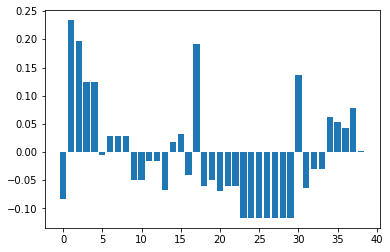

In [227]:
from matplotlib import pyplot
pyplot.bar([x for x in range(len(features_corr))], features_corr)
pyplot.show()

In [228]:
df.shape

(3699, 40)

In [230]:
i = 0
dump = []
for j in features_names:
    if ((features_corr[i]<= 0.01) and (features_corr[i]>= -0.01)):
        print("Not much correlation: ", j)
        df.drop(labels = j, axis = 1, inplace = True)
        dump.append(j) 
    i = i + 1


Not much correlation:  artist_mbtags_count
Not much correlation:  year


In [231]:
print(df.shape)

(3699, 38)


In [233]:
for d in np.unique(dump):
    features_names.remove(d)
print(len(features_names))

37


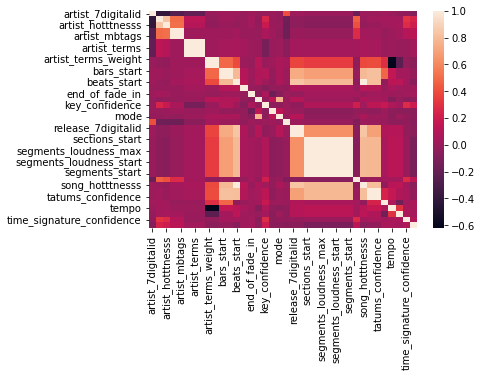

In [234]:
import seaborn as sb
import matplotlib.pyplot as mp
dataplot=sb.heatmap(df.corr())  
# displaying the heatmap of the correlation matrix
mp.show()

### Combining Oversampling with undersampling to treat the imbalance in the data

In [ ]:
y_copy = y
X_copy = X
# print(type(y_copy))
# print(type(X_copy))
# # arr_X = X_copy.to_numpy()
# # print(type(arr_X))

In [36]:
# import matplotlib.pyplot as plt
# _, ax = plt.subplots(figsize=(6, 6))
# ax.scatter(arr_X[:, 0], arr_X[:, 1], c=y, alpha=0.8, edgecolor="k")

In [37]:
# print(len(y_copy))

In [38]:
# len(X_copy)

### Handling Imbalanced Data

#### Label Encoding of the classes:
    0: 'Blues'
    1: 'Country'
    2: 'Electronic'
    3: 'Folk'
    4: 'International'
    5: 'Jazz'
    6: 'Latin'
    7: 'New Age'
    8: 'Pop_Rock'
    9: 'Rap'
    10: 'Reggae'
    11: 'RnB'
    12: 'Vocal'

### Splitting the data into training and testing sets

In [391]:
X = df.copy()
y = df["target"]
X.drop("target", axis = 1, inplace = True)
X.head()

,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_location,artist_mbtags,artist_playmeid,artist_terms,artist_terms_freq,artist_terms_weight,bars_confidence,...,segments_pitches,segments_start,segments_timbre,song_hotttnesss,start_of_fade_out,tatums_confidence,tatums_start,tempo,time_signature,time_signature_confidence
0,0.269899,0.581794,0.371359,0.00,0.00,0.406593,0.406593,0.406593,0.056233,0.056233,...,0.213372,0.213372,0.602120,0.121329,0.087310,0.087310,0.350792,0.571429,0.778,0.666667
1,0.003265,0.630630,0.385680,0.05,0.05,0.417582,0.417582,0.417582,0.049458,0.049458,...,0.120477,0.120477,0.391076,0.076215,0.075000,0.075000,0.461420,0.571429,0.384,0.333333
2,0.031148,0.630382,0.419612,0.15,0.15,0.472527,0.472527,0.472527,0.077913,0.077913,...,0.180274,0.180274,0.391076,0.120322,0.117259,0.117259,0.453882,0.571429,0.000,0.666667
3,0.050583,0.651046,0.371106,0.00,0.00,0.417582,0.417582,0.417582,0.074526,0.074526,...,0.147617,0.147617,0.604501,0.110062,0.112563,0.112563,0.493623,0.571429,0.562,1.000000
4,0.029348,0.556496,0.241977,0.00,0.00,0.153846,0.153846,0.153846,0.147019,0.147019,...,0.105252,0.105252,0.391076,0.063334,0.055076,0.055076,0.425324,0.142857,0.000,0.666667


In [392]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2959, 37)
(740, 37)
(2959,)
(740,)


### 1. KNN

#### A. Testing on the imbalanced dataset without oversampling 

In [245]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 10)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(pred)
# Model Metrics Measures when k = 10
print(classification_report(y_test, pred))

[8 8 8 ... 8 8 9]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.21      0.05      0.08        58
           2       0.44      0.15      0.22        93
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00        52
           5       0.25      0.08      0.12        53
           6       0.19      0.10      0.13        86
           7       0.00      0.00      0.00        27
           8       0.55      0.91      0.68       628
           9       0.21      0.05      0.09        73
          10       0.11      0.03      0.05        33
          11       1.00      0.02      0.04        56
          12       0.00      0.00      0.00        11

    accuracy                           0.50      1221
   macro avg       0.23      0.11      0.11      1221
weighted avg       0.41      0.50      0.40      1221



In [246]:
print('Accuracy = {}'.format(metrics.accuracy_score(y_test, pred)))
print('Precision = {}'.format(precision_score(y_test, pred, average='micro')))
print('Recall = {}'.format(recall_score(y_test, pred, average='micro')))
print('F1-Score = {}'.format(f1_score(y_test, pred, average='micro')))

Accuracy = 0.4954954954954955
Precision = 0.4954954954954955
Recall = 0.4954954954954955
F1-Score = 0.4954954954954955


#### B. Testing on the balanced dataset after oversampling 

### Effect of Using different values of k on the performance

In [ ]:
# k_range = range(1,20)
# scores = []
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors = k)
#     knn.fit(X_train, y_train)
#     scores.append(knn.score(X_test, y_test))

# plt.figure()
# plt.xlabel('k')
# plt.ylabel('performance')
# plt.scatter(k_range, scores)
# plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22]);

### Effect of using different train/test ratio

In [81]:
# t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

# knn = KNeighborsClassifier(n_neighbors = 5)

# plt.figure()

# for s in t:
#     scores = []
#     for i in range(1,10):
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
#         knn.fit(X_train, y_train)
#         scores.append(knn.score(X_test, y_test))
#     plt.plot(s, np.mean(scores), 'bo')

# plt.xlabel('Training set proportion (%)')
# plt.ylabel('accuracy')

### 2. Implementing Decision Trees

In [274]:
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
# tree.plot_tree(clf)


In [275]:
pred = clf.predict(X_test)

In [276]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.09      0.12      0.10        34
           1       0.20      0.17      0.19        58
           2       0.30      0.24      0.27        93
           3       0.06      0.06      0.06        17
           4       0.12      0.12      0.12        52
           5       0.12      0.15      0.13        53
           6       0.20      0.23      0.22        86
           7       0.08      0.07      0.08        27
           8       0.70      0.70      0.70       628
           9       0.20      0.22      0.21        73
          10       0.38      0.45      0.41        33
          11       0.17      0.11      0.13        56
          12       0.00      0.00      0.00        11

    accuracy                           0.45      1221
   macro avg       0.20      0.20      0.20      1221
weighted avg       0.45      0.45      0.45      1221



In [277]:
print('Accuracy = {}'.format(metrics.accuracy_score(y_test, pred)))
print('Precision = {}'.format(precision_score(y_test, pred, average='micro')))
print('Recall = {}'.format(recall_score(y_test, pred, average='micro')))
print('F1-Score = {}'.format(f1_score(y_test, pred, average='micro')))

Accuracy = 0.4520884520884521
Precision = 0.4520884520884521
Recall = 0.4520884520884521
F1-Score = 0.4520884520884521


### 3. Implementing Multi-layer Preceptron and Neural Network

In [373]:
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = MLPClassifier(solver='lbfgs', alpha=1e-3,
                     hidden_layer_sizes=(10, ), random_state=1)
clf.fit(X, y)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.40      0.19      0.26        31
           2       0.47      0.32      0.38        60
           3       0.00      0.00      0.00         8
           4       0.35      0.19      0.25        31
           5       0.31      0.38      0.34        34
           6       0.27      0.08      0.12        49
           7       0.46      0.40      0.43        15
           8       0.63      0.91      0.74       381
           9       0.42      0.40      0.41        47
          10       0.33      0.05      0.08        21
          11       0.00      0.00      0.00        35
          12       0.00      0.00      0.00         9

    accuracy                           0.57       740
   macro avg       0.28      0.23      0.23       740
weighted avg       0.47      0.57      0.50       740



In [374]:
print('Accuracy = {}'.format(metrics.accuracy_score(y_test, pred)))
print('Precision = {}'.format(precision_score(y_test, pred, average='micro')))
print('Recall = {}'.format(recall_score(y_test, pred, average='micro')))
print('F1-Score = {}'.format(f1_score(y_test, pred, average='micro')))

Accuracy = 0.5662162162162162
Precision = 0.5662162162162162
Recall = 0.5662162162162162
F1-Score = 0.5662162162162162


In [318]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(17,), random_state=1)
clf.fit(X, y)
pred = clf.predict(X_test)

In [319]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.25      0.05      0.09        19
           1       0.44      0.26      0.33        31
           2       0.57      0.42      0.48        60
           3       0.00      0.00      0.00         8
           4       0.53      0.29      0.38        31
           5       0.20      0.18      0.19        34
           6       0.46      0.22      0.30        49
           7       0.38      0.33      0.36        15
           8       0.65      0.91      0.76       381
           9       0.49      0.45      0.47        47
          10       0.30      0.14      0.19        21
          11       0.00      0.00      0.00        35
          12       0.00      0.00      0.00         9

    accuracy                           0.59       740
   macro avg       0.33      0.25      0.27       740
weighted avg       0.52      0.59      0.53       740



In [320]:
print('Accuracy = {}'.format(metrics.accuracy_score(y_test, pred)))
print('Precision = {}'.format(precision_score(y_test, pred, average='micro')))
print('Recall = {}'.format(recall_score(y_test, pred, average='micro')))
print('F1-Score = {}'.format(f1_score(y_test, pred, average='micro')))

Accuracy = 0.5905405405405405
Precision = 0.5905405405405405
Recall = 0.5905405405405405
F1-Score = 0.5905405405405405


In [327]:
clf = MLPClassifier(solver='sgd', alpha=1e-10,
                     hidden_layer_sizes=(17,), random_state=1)
clf.fit(X, y)
pred = clf.predict(X_test)

In [328]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        31
           2       0.42      0.13      0.20        60
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        31
           5       0.00      0.00      0.00        34
           6       0.00      0.00      0.00        49
           7       0.00      0.00      0.00        15
           8       0.52      0.98      0.68       381
           9       0.00      0.00      0.00        47
          10       0.00      0.00      0.00        21
          11       0.00      0.00      0.00        35
          12       0.00      0.00      0.00         9

    accuracy                           0.52       740
   macro avg       0.07      0.09      0.07       740
weighted avg       0.30      0.52      0.37       740



In [329]:
print('Accuracy = {}'.format(metrics.accuracy_score(y_test, pred)))
print('Precision = {}'.format(precision_score(y_test, pred, average='micro')))
print('Recall = {}'.format(recall_score(y_test, pred, average='micro')))
print('F1-Score = {}'.format(f1_score(y_test, pred, average='micro')))

Accuracy = 0.5175675675675676
Precision = 0.5175675675675676
Recall = 0.5175675675675676
F1-Score = 0.5175675675675676


### 4. Implementing SVM

#### Try Penalize Algorithms (Cost-Sensitive Training) to help with the imbalance in the data

In [266]:
from sklearn.svm import SVC

clf_1 = SVC(kernel='linear', 
            class_weight='balanced',
            probability=True)
 
clf_1.fit(X_train, y_train)
pred = clf_1.predict(X_test)
# print(np.unique(pred_y_3))
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.06      0.15      0.08        34
           1       0.21      0.41      0.28        58
           2       0.44      0.39      0.41        93
           3       0.02      0.06      0.03        17
           4       0.16      0.29      0.21        52
           5       0.15      0.17      0.16        53
           6       0.20      0.16      0.18        86
           7       0.22      0.41      0.29        27
           8       0.87      0.28      0.42       628
           9       0.23      0.44      0.30        73
          10       0.19      0.27      0.22        33
          11       0.10      0.21      0.14        56
          12       0.03      0.27      0.06        11

    accuracy                           0.28      1221
   macro avg       0.22      0.27      0.21      1221
weighted avg       0.55      0.28      0.33      1221



In [267]:
print('Accuracy = {}'.format(metrics.accuracy_score(y_test, pred)))
print('Precision = {}'.format(precision_score(y_test, pred, average='micro')))
print('Recall = {}'.format(recall_score(y_test, pred, average='micro')))
print('F1-Score = {}'.format(f1_score(y_test, pred, average='micro')))

Accuracy = 0.2841932841932842
Precision = 0.2841932841932842
Recall = 0.2841932841932842
F1-Score = 0.2841932841932842


In [268]:
clf_2 = SVC(kernel='poly', 
            class_weight='balanced', # penalize
            probability=True)
 
clf_2.fit(X_train, y_train)
pred = clf_2.predict(X_test)
print('Accuracy = {}'.format(metrics.accuracy_score(y_test, pred)))
print('Precision = {}'.format(precision_score(y_test, pred, average='micro')))
print('Recall = {}'.format(recall_score(y_test, pred, average='micro')))
print('F1-Score = {}'.format(f1_score(y_test, pred, average='micro')))
print(classification_report(y_test, pred))

Accuracy = 0.33415233415233414
Precision = 0.33415233415233414
Recall = 0.33415233415233414
F1-Score = 0.33415233415233414
              precision    recall  f1-score   support

           0       0.08      0.26      0.12        34
           1       0.25      0.48      0.33        58
           2       0.45      0.37      0.40        93
           3       0.02      0.06      0.03        17
           4       0.17      0.27      0.21        52
           5       0.18      0.25      0.20        53
           6       0.21      0.24      0.23        86
           7       0.24      0.44      0.31        27
           8       0.86      0.36      0.50       628
           9       0.24      0.36      0.28        73
          10       0.21      0.33      0.26        33
          11       0.15      0.21      0.18        56
          12       0.07      0.36      0.11        11

    accuracy                           0.33      1221
   macro avg       0.24      0.31      0.24      1221
weighted av

In [269]:
clf_3 = SVC(kernel='rbf', 
            class_weight='balanced', # penalize
            probability=True)
 
clf_3.fit(X_train, y_train)
pred = clf_3.predict(X_test)
print('Accuracy = {}'.format(metrics.accuracy_score(y_test, pred)))
print('Precision = {}'.format(precision_score(y_test, pred, average='micro')))
print('Recall = {}'.format(recall_score(y_test, pred, average='micro')))
print('F1-Score = {}'.format(f1_score(y_test, pred, average='micro')))
print(classification_report(y_test, pred))

Accuracy = 0.27436527436527436
Precision = 0.27436527436527436
Recall = 0.27436527436527436
F1-Score = 0.27436527436527436
              precision    recall  f1-score   support

           0       0.07      0.21      0.11        34
           1       0.23      0.48      0.31        58
           2       0.49      0.35      0.41        93
           3       0.04      0.18      0.07        17
           4       0.22      0.33      0.26        52
           5       0.14      0.19      0.16        53
           6       0.20      0.20      0.20        86
           7       0.24      0.41      0.30        27
           8       0.85      0.24      0.38       628
           9       0.18      0.34      0.23        73
          10       0.14      0.33      0.20        33
          11       0.13      0.27      0.18        56
          12       0.07      0.45      0.12        11

    accuracy                           0.27      1221
   macro avg       0.23      0.31      0.23      1221
weighted av

In [270]:
clf_4 = SVC(kernel='sigmoid', 
            class_weight='balanced', # penalize
            probability=True)
 
clf_4.fit(X_train, y_train)
pred = clf_4.predict(X_test)
print('Accuracy = {}'.format(metrics.accuracy_score(y_test, pred)))
print('Precision = {}'.format(precision_score(y_test, pred, average='micro')))
print('Recall = {}'.format(recall_score(y_test, pred, average='micro')))
print('F1-Score = {}'.format(f1_score(y_test, pred, average='micro')))
print(classification_report(y_test, pred))

Accuracy = 0.07944307944307945
Precision = 0.07944307944307945
Recall = 0.07944307944307945
F1-Score = 0.07944307944307945
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.14      0.17      0.16        58
           2       0.09      0.19      0.13        93
           3       0.06      0.06      0.06        17
           4       0.00      0.00      0.00        52
           5       0.17      0.04      0.06        53
           6       0.08      0.01      0.02        86
           7       0.07      0.11      0.09        27
           8       0.76      0.05      0.10       628
           9       0.10      0.19      0.13        73
          10       0.21      0.09      0.13        33
          11       0.07      0.11      0.09        56
          12       0.01      0.45      0.02        11

    accuracy                           0.08      1221
   macro avg       0.14      0.11      0.07      1221
weighted av

### 5. Implementing Naive Bayes

In [271]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
gnb = GaussianNB()

pred = gnb.fit(X_train, y_train).predict(X_test)

print('Accuracy = {}'.format(metrics.accuracy_score(y_test, pred)))
print('Precision = {}'.format(precision_score(y_test, pred, average='micro')))
print('Recall = {}'.format(recall_score(y_test, pred, average='micro')))
print('F1-Score = {}'.format(f1_score(y_test, pred, average='micro')))
print(classification_report(y_test, pred))

Accuracy = 0.2
Precision = 0.2
Recall = 0.2
F1-Score = 0.20000000000000004
              precision    recall  f1-score   support

           0       0.10      0.19      0.13        27
           1       0.09      0.43      0.15        35
           2       0.37      0.41      0.39        46
           3       0.02      0.10      0.04        10
           4       0.10      0.08      0.09        25
           5       0.24      0.18      0.20        28
           6       0.08      0.02      0.03        50
           7       0.19      0.16      0.17        19
           8       0.79      0.18      0.29       392
           9       0.12      0.06      0.08        47
          10       0.17      0.66      0.27        32
          11       0.00      0.00      0.00        23
          12       0.04      0.50      0.08         6

    accuracy                           0.20       740
   macro avg       0.18      0.23      0.15       740
weighted avg       0.49      0.20      0.23       740



In [272]:
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf = MultinomialNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('Accuracy = {}'.format(metrics.accuracy_score(y_test, pred)))
print('Precision = {}'.format(precision_score(y_test, pred, average='micro')))
print('Recall = {}'.format(recall_score(y_test, pred, average='micro')))
print('F1-Score = {}'.format(f1_score(y_test, pred, average='micro')))
print(classification_report(y_test, pred))

Accuracy = 0.5324324324324324
Precision = 0.5324324324324324
Recall = 0.5324324324324324
F1-Score = 0.5324324324324324
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.00      0.00      0.00        35
           2       0.67      0.04      0.08        46
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        28
           6       0.00      0.00      0.00        50
           7       0.00      0.00      0.00        19
           8       0.53      1.00      0.69       392
           9       0.00      0.00      0.00        47
          10       0.00      0.00      0.00        32
          11       0.00      0.00      0.00        23
          12       0.00      0.00      0.00         6

    accuracy                           0.53       740
   macro avg       0.09      0.08      0.06       740
weighted avg   

### 6. Implementing Logistic Regression

In [273]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf = LogisticRegression(random_state=0, class_weight = "balanced")
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('Accuracy = {}'.format(metrics.accuracy_score(y_test, pred)))
print('Precision = {}'.format(precision_score(y_test, pred, average='micro')))
print('Recall = {}'.format(recall_score(y_test, pred, average='micro')))
print('F1-Score = {}'.format(f1_score(y_test, pred, average='micro')))
print(classification_report(y_test, pred))

Accuracy = 0.2972972972972973
Precision = 0.2972972972972973
Recall = 0.2972972972972973
F1-Score = 0.2972972972972973
              precision    recall  f1-score   support

           0       0.09      0.11      0.10        27
           1       0.17      0.34      0.23        35
           2       0.31      0.43      0.36        46
           3       0.09      0.30      0.14        10
           4       0.11      0.20      0.14        25
           5       0.23      0.21      0.22        28
           6       0.26      0.18      0.21        50
           7       0.17      0.37      0.24        19
           8       0.90      0.31      0.47       392
           9       0.26      0.43      0.32        47
          10       0.16      0.22      0.18        32
          11       0.04      0.13      0.06        23
          12       0.03      0.33      0.06         6

    accuracy                           0.30       740
   macro avg       0.22      0.27      0.21       740
weighted avg   

## Model Choice: ANN with 1 hidden layer with 17 neurons

####  input layer with 37 node -->> hidden layer with 17 neurons --->> output layer with 1 output node

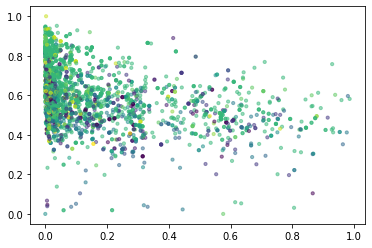

2959
37
Loss function value:  17391.75274773159
Loss function value:  6484.557245737932
Loss function value:  5866.380371063915
Loss function value:  5701.209528305512
Loss function value:  5623.602830616054
Loss function value:  5568.456285351627
Loss function value:  5524.819789845235
Loss function value:  5488.912826235283
Loss function value:  5458.656581675414
Loss function value:  5432.689886977727
Loss function value:  5410.062087321543
Loss function value:  5390.085016638146
Loss function value:  5372.2476441203735
Loss function value:  5356.162729312091
Loss function value:  5341.531802185422
Loss function value:  5328.121348024516
Loss function value:  5315.746172437518
Loss function value:  5304.25753696191
Loss function value:  5293.534555946396
Loss function value:  5283.477873703701
Loss function value:  5274.004964695951
Loss function value:  5265.046605400097
Loss function value:  5256.544201618918
Loss function value:  5248.447746081344
Loss function value:  5240.71424

Loss function value:  4666.78067273956
Loss function value:  4664.356756318357
Loss function value:  4661.940630159926
Loss function value:  4659.532772910261
Loss function value:  4657.1336583862285
Loss function value:  4654.743753129015
Loss function value:  4652.363513965878
Loss function value:  4649.993385608252
Loss function value:  4647.633798314953
Loss function value:  4645.285165649422
Loss function value:  4642.947882359447
Loss function value:  4640.622322406758
Loss function value:  4638.308837172137
Loss function value:  4636.007753859363
Loss function value:  4633.719374118293
Loss function value:  4631.44397290398
Loss function value:  4629.181797584765
Loss function value:  4626.9330673079985
Loss function value:  4624.6979726275695
Loss function value:  4622.476675392834
Loss function value:  4620.2693088939595
Loss function value:  4618.0759782543155
Loss function value:  4615.896761056499
Loss function value:  4613.731708184858
Loss function value:  4611.5808448642

Loss function value:  4359.582668389548
Loss function value:  4358.638474314388
Loss function value:  4357.697240943158
Loss function value:  4356.7589484873315
Loss function value:  4355.823577365674
Loss function value:  4354.891108202935
Loss function value:  4353.961521828528
Loss function value:  4353.034799275185
Loss function value:  4352.110921777594
Loss function value:  4351.189870771021
Loss function value:  4350.271627889911
Loss function value:  4349.35617496647
Loss function value:  4348.443494029238
Loss function value:  4347.533567301629
Loss function value:  4346.626377200471
Loss function value:  4345.721906334522
Loss function value:  4344.820137502963
Loss function value:  4343.921053693888
Loss function value:  4343.024638082772
Loss function value:  4342.130874030921
Loss function value:  4341.239745083913
Loss function value:  4340.351234970019
Loss function value:  4339.465327598616
Loss function value:  4338.582007058581
Loss function value:  4337.701257616676


In [468]:
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

# generate the one-hot-encodings
T = np.zeros((2959, 13))
for i in range(2959):
    T[i, y_train[i]] = 1

# visualize the data
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=10, alpha=0.5)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

samples = X_train.shape[0] # 2959 samples
features = X_train.shape[1] # 37 features

print(samples)
print(features)

hidden_nodes = 17
classes = 13

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

# randomly initialize weights

W1 = np.random.randn(features, hidden_nodes)
b1 = np.random.randn(hidden_nodes)
W2 = np.random.randn(hidden_nodes, classes)
b2 = np.random.randn(classes)

alpha = 10e-6
costs = []
for epoch in range(50000):
    # forward propagation
    A = sigmoid(X_train.dot(W1) + b1) # A = sigmmoid(Z)
    Y = softmax(A.dot(W2) + b2) # Y = softmax(Z2)

    # backward propagation
    delta2 = Y - T
    delta1 = (delta2).dot(W2.T) * A * (1 - A)

    W2 -= alpha * A.T.dot(delta2)
    b2 -= alpha * (delta2).sum(axis=0)

    W1 -= alpha * X_train.T.dot(delta1)
    b1 -= alpha * (delta1).sum(axis=0)

    # loss function values across training epochs
    if epoch % 100 == 0:
        loss = np.sum(-T * np.log(Y))
        print('Loss function value: ', loss)
        costs.append(loss)

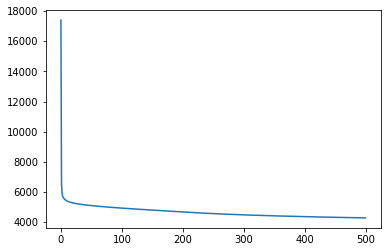

In [469]:
plt.plot(costs)
plt.show()

In [488]:
def predict(W1, W2, b1, b2, X_test):    
    m = X_test.shape[1]
    y_pred = np.zeros((1,m))
    
    A = sigmoid(X_test.dot(W1) + b1) 
    y_pred = softmax(A.dot(W2) + b2) 
    
    pred = np.zeros(X_test.shape[0])
    
    for i in range(X_test.shape[0]):
        temp = np.where(y_pred[i]==y_pred[i].max())
        temp = str(temp[0]).lstrip('[').rstrip(']')
        pred[i] = int(temp)    
    return pred

pred = predict(W1, W2, b1, b2, X_test)

np.savetxt('C:\\Users\\EMAN\\Desktop\\FeaturesExtraction\\trained_param\\W1.txt', W1)
np.savetxt('C:\\Users\\EMAN\\Desktop\\FeaturesExtraction\\trained_param\\W2.txt', W2)
np.savetxt('C:\\Users\\EMAN\\Desktop\\FeaturesExtraction\\trained_param\\b1.txt', b1)
np.savetxt('C:\\Users\\EMAN\\Desktop\\FeaturesExtraction\\trained_param\\b2.txt', b2)


In [471]:
print('Accuracy = {}'.format(metrics.accuracy_score(y_test, pred)))
print('Precision = {}'.format(precision_score(y_test, pred, average='micro')))
print('Recall = {}'.format(recall_score(y_test, pred, average='micro')))
print('F1-Score = {}'.format(f1_score(y_test, pred, average='micro')))
print(classification_report(y_test, pred))

Accuracy = 0.5513513513513514
Precision = 0.5513513513513514
Recall = 0.5513513513513514
F1-Score = 0.5513513513513514
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.24      0.11      0.15        35
           2       0.43      0.41      0.42        46
           3       0.00      0.00      0.00        10
           4       0.25      0.08      0.12        25
           5       0.16      0.14      0.15        28
           6       0.20      0.02      0.04        50
           7       0.43      0.16      0.23        19
           8       0.61      0.94      0.74       392
           9       0.33      0.17      0.23        47
          10       0.00      0.00      0.00        32
          11       0.00      0.00      0.00        23
          12       0.00      0.00      0.00         6

    accuracy                           0.55       740
   macro avg       0.20      0.16      0.16       740
weighted avg   